In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]) 

In [5]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

### Task 1 - Подберите скорость обучения (alpha) и количество итераций

The best parametrs:
 iteration = 2400
 value = 45.937499999999986 


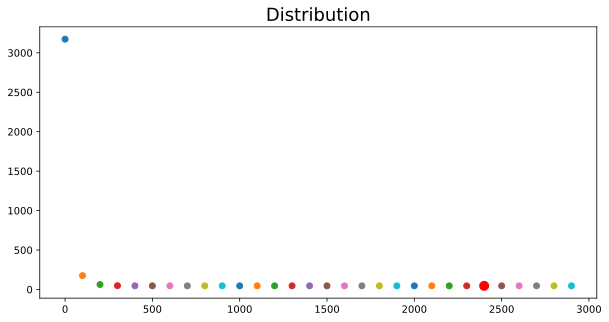

In [74]:
plt.figure(figsize=(10,5))
n = X.shape[1]
alpha = 1e-2
errors = []
iteretions = []
w = np.array([1, 0.5])
for i in range(3000):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
    if i % 100 == 0:
        errors.append(err)
        iteretions.append(i)
        plt.scatter(i,err)
print(f'The best parametrs:\n iteration = {iteretions[errors.index(min(errors))]}\n value = {errors[errors.index(min(errors))]} ')
plt.scatter(iteretions[errors.index(min(errors))],errors[errors.index(min(errors))], color='red', s=80, marker='o')
plt.title('Distribution',fontdict={'fontsize':18})
plt.show()

### Task 2 - В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001848
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666764
400 [46.56511152  4.03388672] 46.18175564810758
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758049
800 [47.2219474   3.91259695] 45.937557064435396
900 [47.228558    3.91137626] 45.937507054979434


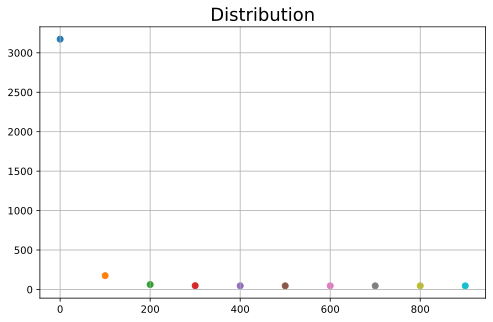

In [75]:
w = np.array([1, 0.5])
plt.figure(figsize=(8,5))
plt.title('Distribution',fontdict={'fontsize':18})
plt.grid(True)
for i in range(1000):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    w -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))
    if i % 100 == 0:
        print(i, w, err)
        plt.scatter(i, err)

### Task 3 - Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога

In [10]:
n = X.shape[1]
w = np.array([1, 0.5])
i = 0
err = np.inf
alpha = 1e-2
while True:
    y_pred = np.dot(w, X)
    err_new = calc_mse(y, y_pred)
    w -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y),axis=1)))
    i += 1
    if(abs(err - err_new))<1e-8:
        break
    else:
        err = err_new

print('Iteration ', i, w, err)

Iteration  1031 [47.23122165  3.91088439] 45.93750047571161
